In [1]:
print('ok')

ok


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
base =[
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df = df[base]

In [9]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA
- Look at the fuel_efficiency_mpg variable. Does it have a long tail?

No, it does not have a long tail.

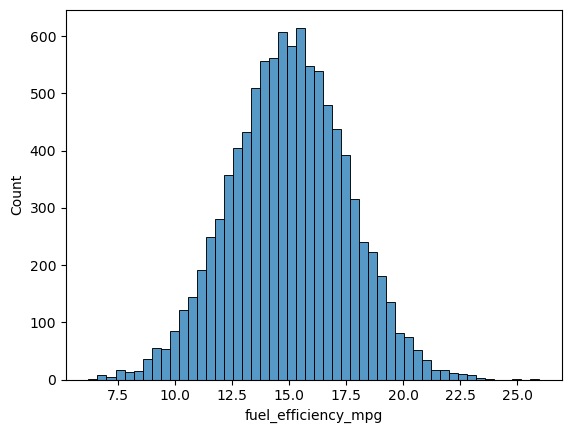

In [10]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)
plt.show()

## Question 1
- There's one column with missing values. What is it?

- horsepower has missing values.

In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2
- What's the median (50% percentile) for variable 'horsepower'?

In [12]:
print(f'The median for variable horsepower is {int(df.horsepower.median())}.')

The median for variable horsepower is 149.


In [13]:
n = len(df)

n_val = int(n * 0.2) # 20%
n_test = int(n * 0.2) # 20%
n_train = n - n_val - n_test # 60%

n_val, n_test, n_train

(1940, 1940, 5824)

In [14]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [15]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [18]:
len(y_train)

5824

In [19]:
# Drop target feature training, validation, and test sets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [20]:
len(y_train)

5824

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
  
Options:

- With 0
- **With mean**
- Both are equally good

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [22]:
def prepare_X_0(df):
    df_0 = df.fillna(0)
    X = df_0.values
    return X

In [23]:
def prepare_X_mean(df):
    df_mean = df.fillna(df.mean())
    X = df_mean.values
    return X

In [24]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

## Fill with 0

In [25]:
# Train
X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

In [26]:
# Validation
X_val_0 = prepare_X_0(df_val)
y_pred_0 = w0 + X_val_0.dot(w)

In [27]:
print(rmse(y_val, y_pred_0).round(2))

0.52


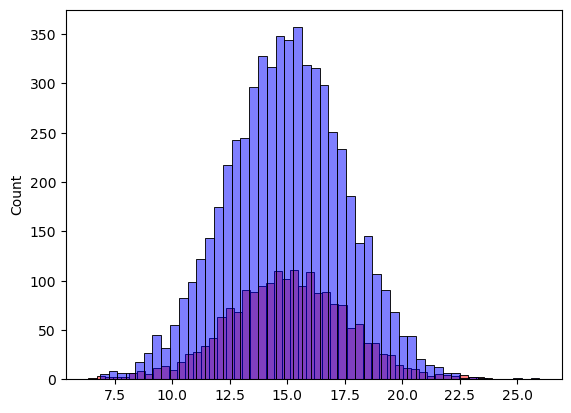

In [28]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

## Fill the mean value

In [29]:
# Train
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

In [30]:
# Validation
X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w0 + X_val_mean.dot(w)

In [31]:
print(rmse(y_val, y_pred_mean).round(2))

0.46


## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score.round(2))

0 28.827365475110508 0.52
0.01 24.926838420746655 0.52
0.1 11.239661085057673 0.52
1 1.7315979412627578 0.52
5 0.3638075020705208 0.52
10 0.18306246622663597 0.52
100 0.018418017307757002 0.52


## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [35]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

n = len(df)
n_val = int(n * 0.2)  # 20% for validation
n_test = int(n * 0.2)  # 20% for test
n_train = n - n_val - n_test  # 60% for train

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    # Splitting data into train, validation, and test
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Reset indices
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Applying log1p transformation
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    
    # Calculate RMSE
    score = rmse(y_val, y_pred)
    
    print(f'\n The score for the seed {seed} is: {round(score, 3)}')
    scores.append(score)

# Standard deviation of the exponential scores
std_dev = np.std(scores)
print(f'\nThe standard deviation of the scores is: {round(std_dev, 3)}')


 The score for the seed 0 is: 0.521

 The score for the seed 1 is: 0.521

 The score for the seed 2 is: 0.523

 The score for the seed 3 is: 0.516

 The score for the seed 4 is: 0.511

 The score for the seed 5 is: 0.528

 The score for the seed 6 is: 0.531

 The score for the seed 7 is: 0.509

 The score for the seed 8 is: 0.515

 The score for the seed 9 is: 0.513

The standard deviation of the scores is: 0.007


## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [36]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) + r * np.eye(X.shape[1]) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
seed = 9
n = len(df)
n_test = int(n * 0.2) 
n_train = n - n_test  

np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train = prepare_X_0(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X_0(df_test)
y_pred_test = w0 + X_test.dot(w)

rmse_test = rmse(y_test, y_pred_test)

print(rmse_test)

0.5156261299202296
